# Tourmaline Python Notebook

## Install Dependencies (first time only)

Install QIIME 2 Jupyter extension with:

then restart your server.

(Interactive output not available on static notebook viewer services like nbviewer.)

## Package Imports

In [1]:
from qiime2 import Artifact
from qiime2 import Visualization
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Variables

In [2]:
method = 'dada2-pe'
filtering = 'unfiltered'
adiv_metric = 'observed_features'
bdiv_metric = 'unweighted_unifrac'
factor1='filter_size'
factor2='region'

## Paths

In [3]:
inputs = {
  'metadata': '../00-data/metadata.tsv',
  'taxonomy': '../02-output-%s-%s/01-taxonomy/taxonomy.qza' % (method, filtering),
  'repseq_prop': '../02-output-%s-%s/02-alignment-tree/repseqs_properties.tsv' % (method, filtering),
  'adiv_vector': '../02-output-%s-%s/03-alpha-diversity/%s_vector.qza' % (method, filtering, adiv_metric),
  'repseqs_viz': '../02-output-%s-%s/00-table-repseqs/repseqs.qzv' % (method, filtering),
  'table_viz': '../02-output-%s-%s/00-table-repseqs/table.qzv' % (method, filtering),
  'taxonomy_viz': '../02-output-%s-%s/01-taxonomy/taxonomy.qzv' % (method, filtering),
  'taxa_bar': '../02-output-%s-%s/01-taxonomy/taxa_barplot.qzv' % (method, filtering),
  'rooted_tree': '../02-output-%s-%s/02-alignment-tree/rooted_tree.qzv' % (method, filtering),
  'adiv_grpsig': '../02-output-%s-%s/03-alpha-diversity/%s_group_significance.qzv' % (method, filtering, adiv_metric),
  'bdiv_emperor': '../02-output-%s-%s/04-beta-diversity/%s_emperor.qzv' % (method, filtering, bdiv_metric),
  'bdiv_grpsig': '../02-output-%s-%s/04-beta-diversity/%s_group_significance.qzv' % (method, filtering, bdiv_metric)
}

## DataFrames

### Metadata

In [4]:
df_md = pd.read_csv(inputs['metadata'], sep='\t', index_col=0)
df_md.head(3)

,sample_name_water,description,control_status,sample_pairing,sample_pairs,esp_storage_carousel,sample_station,auv_latitude_deg,auv_longitude_deg,archive_bottom,...,target_gene,target_subfragment,pcr_primers,pcr_primer_names,seq_meth,seq_platform,seq_model,seq_chemistry,run_center,run_date
sample_name,,,,,,,,,,,,,,,,,,,,,
SC05.22,SC05,Lake Erie sample,Lake Erie sample,"paired with SC07, SC06",15,SC05,Field 53-spare,41.703431,-83.070777,158,...,16S rRNA,V4,FWD:GTGYCAGCMGCCGCGGTAA; REV:GGACTACNVGGGTWTCTAAT,FWD:EMP-16S-515F-Parada; REV:EMP-16S-806R-Apprill,Illumina MiSeq 2x300bp (600 cycles) v3 chemistry,Illumina,MiSeq,2x300bp (600 cycles) v3 chemistry,University of Michigan Advanced Genomics Core,"September, 2019"
SC05.50,SC05,Lake Erie sample,Lake Erie sample,"paired with SC07, SC06",15,SC05,Field 53-spare,41.703431,-83.070777,158,...,16S rRNA,V4,FWD:GTGYCAGCMGCCGCGGTAA; REV:GGACTACNVGGGTWTCTAAT,FWD:EMP-16S-515F-Parada; REV:EMP-16S-806R-Apprill,Illumina MiSeq 2x300bp (600 cycles) v3 chemistry,Illumina,MiSeq,2x300bp (600 cycles) v3 chemistry,University of Michigan Advanced Genomics Core,"September, 2019"
SC06.22,SC06,Lake Erie sample,Lake Erie sample,"paired with SC07, SC05",15,SC06,Field 52-spare,41.703430,-83.070775,270,...,16S rRNA,V4,FWD:GTGYCAGCMGCCGCGGTAA; REV:GGACTACNVGGGTWTCTAAT,FWD:EMP-16S-515F-Parada; REV:EMP-16S-806R-Apprill,Illumina MiSeq 2x300bp (600 cycles) v3 chemistry,Illumina,MiSeq,2x300bp (600 cycles) v3 chemistry,University of Michigan Advanced Genomics Core,"September, 2019"


### Representative sequences properties

In [5]:
repseq_prop = pd.read_csv(inputs['repseq_prop'], sep='\t', index_col=0)
repseq_prop

,length,gaps,outlier,taxonomy,observations
featureid,,,,,
b744eae1244325f606575483df0de67e,253,173,False,d__Bacteria,966.0
9cfa52be027c8fa57d197b21dd7a958c,253,173,False,d__Bacteria,568.0
3f456a18968cea5c5e549e281f0f5808,253,173,False,d__Bacteria,488.0
251fb9e771085e0267a4f87cf841ce2f,253,173,False,d__Bacteria,340.0
01514b1eefaab7c2b75c8a9d0f1c85e6,253,173,False,d__Bacteria,302.0
...,...,...,...,...,...
8cf25076a0b004572d19f315bbb5acb0,253,175,True,d__Bacteria,2.0
c661eabf2e8d41d860c090f95a74c337,253,173,False,d__Bacteria,2.0
f94ca97c836668e666c34504b6edcb5e,253,173,False,d__Bacteria,2.0


### Taxonomy

In [6]:
taxonomy = Artifact.load(inputs['taxonomy'])
df_tax = taxonomy.view(view_type=pd.DataFrame)
df_tax

,Taxon,Consensus
Feature ID,,
b744eae1244325f606575483df0de67e,d__Bacteria; p__Proteobacteria; c__Alphaproteo...,0.7
9cfa52be027c8fa57d197b21dd7a958c,d__Bacteria; p__Actinobacteriota; c__Actinobac...,0.6
3f456a18968cea5c5e549e281f0f5808,d__Bacteria; p__Actinobacteriota; c__Actinobac...,0.9
251fb9e771085e0267a4f87cf841ce2f,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,1.0
01514b1eefaab7c2b75c8a9d0f1c85e6,d__Bacteria; p__Cyanobacteria; c__Cyanobacteri...,1.0
...,...,...
b9f7087d9e362d1b1274775a69943f88,Unassigned,0.0
cc351352391279e1b2b046bc51f454d6,Unassigned,0.0
e4aa39efaf6dd184a06332b2de72d3d4,Unassigned,0.0


## Static Plots

### Representative sequences: histogram of sequence length

/Users/luke.thompson/miniconda3/envs/qiime2-2020.8/lib/python3.6/site-packages/seaborn/distributions.py:369: UserWarning: Default bandwidth for data is 0; skipping density estimation.
  warnings.warn(msg, UserWarning)


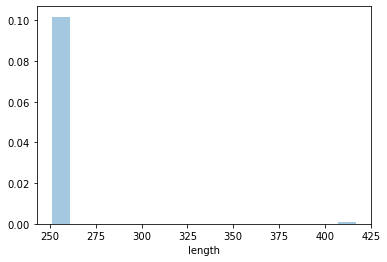

In [7]:
sns.distplot(repseq_prop['length'])

### Representative sequences: scatterplot of gaps vs length, color by taxonomy, size by observations, shape by outlier

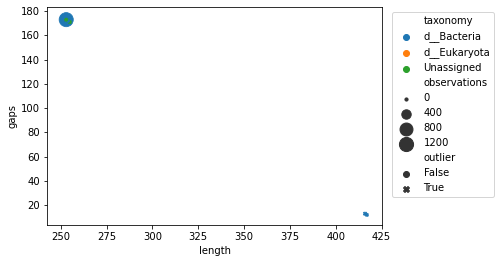

In [8]:
fig, ax = plt.subplots()
sns.scatterplot(ax=ax, data=repseq_prop, x='length', y='gaps', style='outlier', hue='taxonomy', size='observations', 
                sizes=(10,200), edgecolor=None)
ax.legend(bbox_to_anchor=(1.35, 1.0));

### Alpha-diversity boxplots

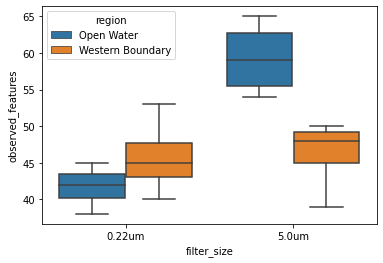

In [9]:
adiv_vector = Artifact.load(inputs['adiv_vector'])
df_adiv = adiv_vector.view(pd.Series)
df_adiv_md = pd.merge(df_md, df_adiv, left_index=True, right_index=True)
sns.boxplot(data=df_adiv_md, y=adiv_metric, x=factor1, hue=factor2)

## Interactive Visualizations

### Feature table

In [10]:
Visualization.load(inputs['table_viz'])

<visualization: Visualization uuid: 59cf1045-cbc0-4d9d-ba63-2fc7bae70d43>

### Representative sequences

In [11]:
Visualization.load(inputs['repseqs_viz'])

<visualization: Visualization uuid: 5ec82db2-0809-4ca5-a87b-6e2f7a9b1b28>

### Rooted tree

In [12]:
Visualization.load(inputs['rooted_tree'])

<visualization: Visualization uuid: 21ba588d-a5c8-4351-812d-b4948feb1e9d>

### Taxonomy

In [13]:
Visualization.load(inputs['taxonomy_viz'])

<visualization: Visualization uuid: 8252e7e5-7b59-43ce-8f73-2f32fdfc33e2>

### Taxonomy barplot

In [14]:
Visualization.load(inputs['taxa_bar'])

<visualization: Visualization uuid: fdc31811-9a59-466a-833b-77f75c2f2677>

### Alpha-diversity group significance

In [15]:
Visualization.load(inputs['adiv_grpsig'])

<visualization: Visualization uuid: 0fc85a33-150f-40ff-918e-2ce2423683ae>

### Beta-diversity PCoA Emperor plot

In [16]:
Visualization.load(inputs['bdiv_emperor'])

<visualization: Visualization uuid: bce67406-1d1e-49bd-92d9-360bcc67ecca>

### Beta-diversity group significance

In [17]:
Visualization.load(inputs['bdiv_grpsig'])

<visualization: Visualization uuid: 0dc6780f-f25b-4840-a16f-7ad9262f26ea>

In [18]:
Visualization?